In [1]:
from ontocluster_test import OntoClusterer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Import and Preprocess Data

In [2]:
def delete_numbers(s): 
    return re.sub(r'[0-9]+', '', s)

In [3]:
sw = stopwords.words('english')
data = fetch_20newsgroups()
temp = pd.DataFrame({'text':data.data, 'label':data.target})

temp['text'] = temp['text'].apply(delete_numbers)
vectorizer = TfidfVectorizer(stop_words = sw, max_features=20)
X = vectorizer.fit_transform(temp['text']).toarray()
feature_names = [pair[0] for pair in sorted(vectorizer.vocabulary_.items(), key = lambda x: x[1])]

pca = PCA(n_components = 2)
X_dec = pca.fit_transform(X)

In [4]:
data = pd.DataFrame(X, columns = vectorizer.vocabulary_.keys())

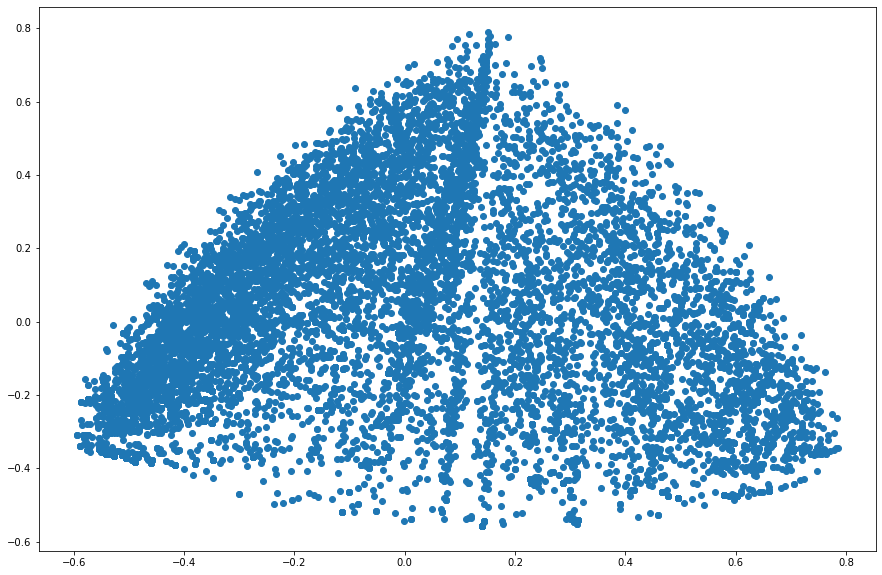

In [5]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(X_dec[:, 0], X_dec[:, 1]);

# Tests

## HDBSCAN

In [6]:
%%time
model = OntoClusterer('hdbscan')
onto = model.fit(X, data, grid_params = {'min_cluster_size':[2, 3, 4, 5, 6, 7, 8]}, scoring = 'silhouette_score')
onto.save('hdbscan.owl')

[[{'min_cluster_size': 2}, 0.03271747921240801], [{'min_cluster_size': 3}, -0.0811330941797974], [{'min_cluster_size': 4}, -0.13339650297065303], [{'min_cluster_size': 5}, -0.15248431664425308], [{'min_cluster_size': 6}, -0.16557755377831046], [{'min_cluster_size': 7}, -0.17631511902766453], [{'min_cluster_size': 8}, -0.1892599169791287]]
0
Wall time: 1min 11s


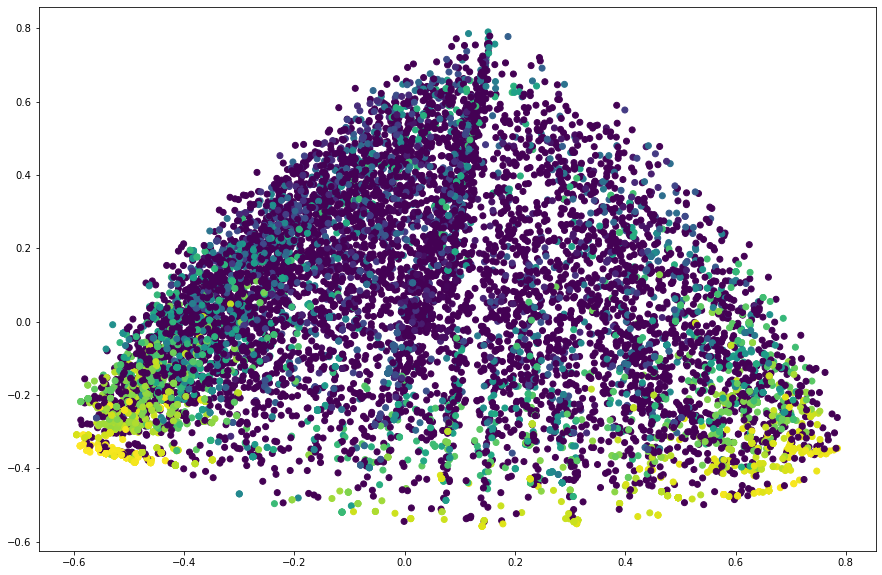

In [7]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);

## XMeans

In [5]:
%%time
model = OntoClusterer('xmeans')
onto = model.fit(X, data, grid_params = {'kmax':range(0, 100, 10)}, scoring = 'silhouette_score')
onto.save('xmeans.owl')

[[{'kmax': 0}, 0.15067266113916153], [{'kmax': 10}, 0.13684403558227623], [{'kmax': 20}, 0.12671009140107978], [{'kmax': 30}, 0.1250293873586706], [{'kmax': 40}, 0.12865380222879966], [{'kmax': 50}, 0.1328401538795616], [{'kmax': 60}, 0.12487418771062214], [{'kmax': 70}, 0.1358059311193289], [{'kmax': 80}, 0.12980774850078122], [{'kmax': 90}, 0.1343791814154984]]
0
Wall time: 44.2 s


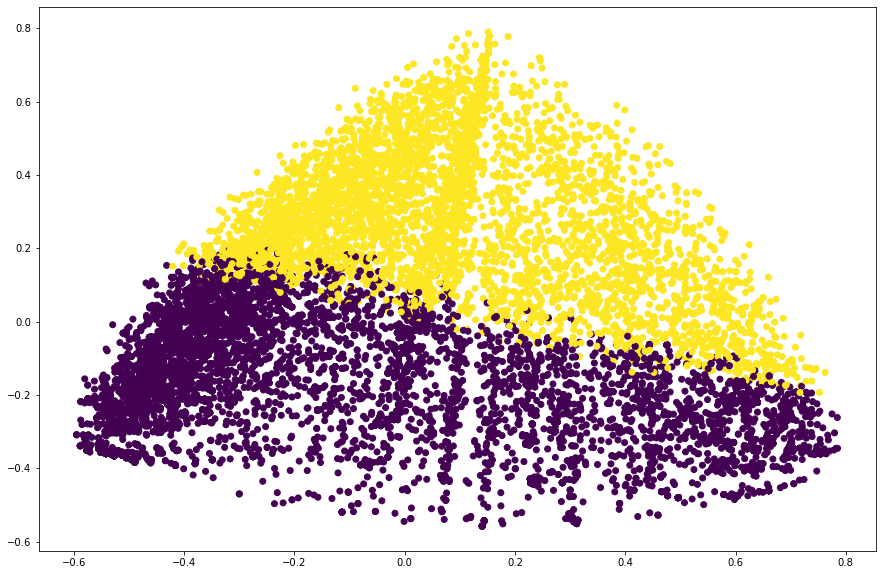

In [6]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.labels);

## Affinity Propagation

In [5]:
%%time
model = OntoClusterer('affinitypropagation')
onto = model.fit(X, data, grid_params = {'max_iter':range(100, 1000, 100)}, scoring = 'silhouette_score')
onto.save('affinitypropagation.owl')

C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "
C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\aeivanov\Programs\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence 

KeyboardInterrupt: 

AttributeError: 'OntoClusterer' object has no attribute 'model'

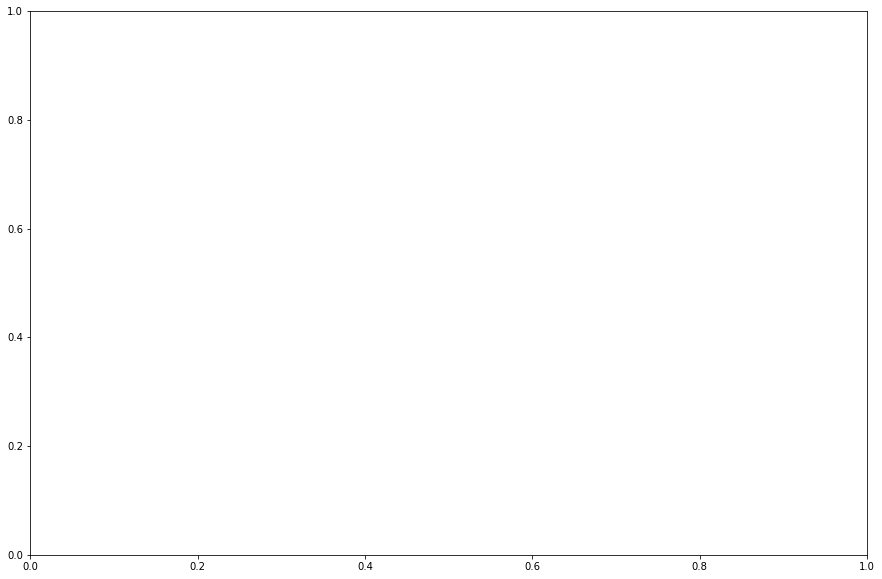

In [6]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);

## Mean Shift

In [5]:
%%time
model = OntoClusterer('meanshift')
onto = model.fit(X, data, grid_params = {'bandwidth':[2, 3, 4, 5, 6], 'max_iter':[300, 600, 900]}, scoring = 'silhouette_score')
onto.save('meanshift.owl')

Wall time: 25min 37s


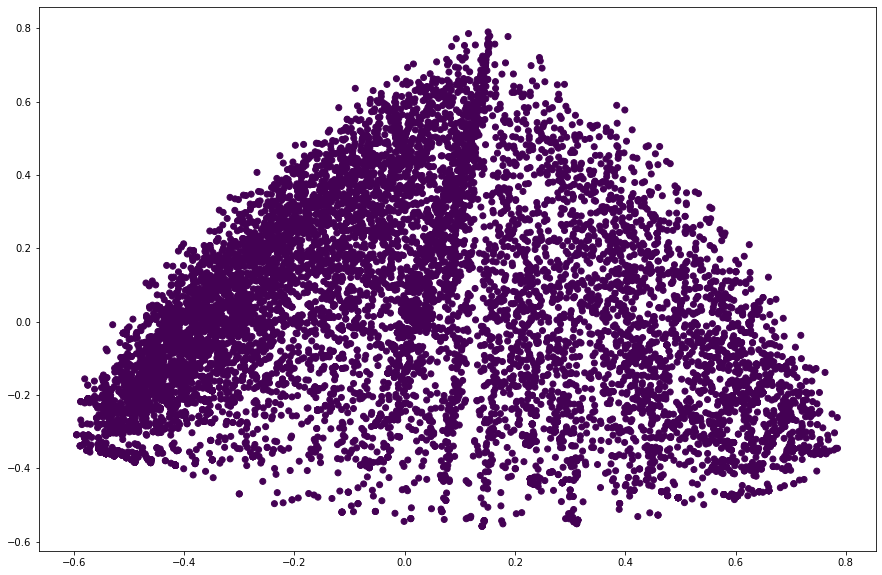

In [6]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);

In [5]:
model = OntoClusterer('hdbscan')
model.score(X)

,Time,Silhouette score,Calinski-Harabasz score,Davies-Bouldin score
HDBSCAN,7023.0,-0.15248431664425308,20.76715758664034,1.0661020247305055
XMeans,551.0,0.12560426850654835,737.7078745217472,1.9341020916607845
Best,Lower,1,Higher,0
